## Linear Rgression from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
df  = pd.read_excel (r'Folds5x2_pp.xlsx')

In [3]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [4]:
df1 = df[['AT','PE']]

In [5]:
#The plots were gtting densed, so only 3000 rows were chosen
df1 = df1.iloc[:3000,]

In [6]:
df1.isnull().sum()

AT    0
PE    0
dtype: int64

In [7]:
z_scores = stats.zscore(df1)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df1[filtered_entries]

print('Length of dataset before removing outliers: %.0f' % (len(df1)))
print('Length of dataset after removing outliers: %.0f' % (len(new_df)))

Length of dataset before removing outliers: 3000
Length of dataset after removing outliers: 3000


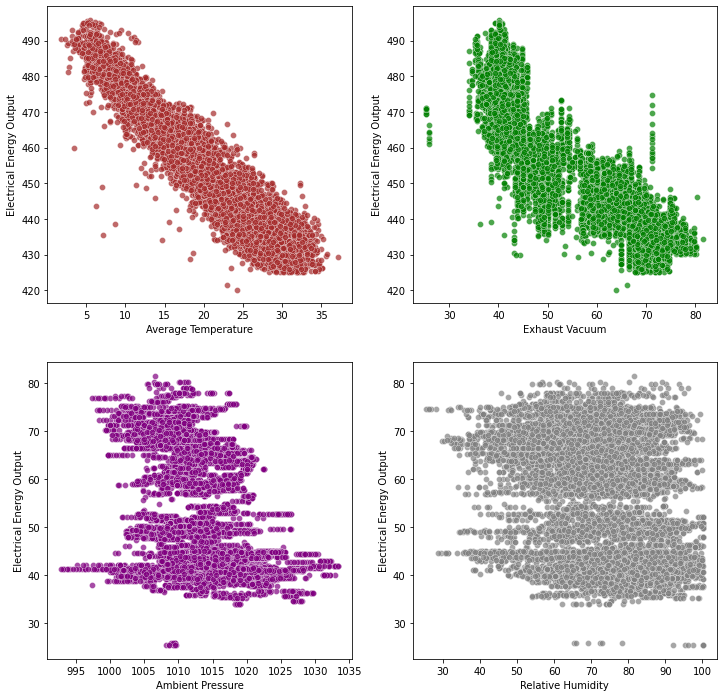

In [8]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].scatter(x = df['AT'], y = df['PE'], color = "brown", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
ax[0,0].set_xlabel("Average Temperature")
ax[0,0].set_ylabel("Electrical Energy Output")

ax[0,1].scatter(x = df['V'], y = df['PE'], color = "green", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
ax[0,1].set_xlabel("Exhaust Vacuum")
ax[0,1].set_ylabel("Electrical Energy Output")

ax[1,0].scatter(x = df['AP'], y = df['V'], color = "purple", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
ax[1,0].set_xlabel("Ambient Pressure")
ax[1,0].set_ylabel("Electrical Energy Output")

ax[1,1].scatter(x = df['RH'], y = df['V'], color = "grey", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
ax[1,1].set_xlabel("Relative Humidity")
ax[1,1].set_ylabel("Electrical Energy Output")

plt.show()

In [9]:
# Shuffle the dataset 
shuffle_df = new_df.sample(frac=1)

# Define a size for the train set 
train_size = int(0.7 * len(new_df))

# Split the dataset 
x_train = list((shuffle_df[:train_size]).iloc[:,0])
y_train = list((shuffle_df[:train_size]).iloc[:,1])
x_test = list((shuffle_df[train_size:]).iloc[:,0])
y_test = list((shuffle_df[train_size:]).iloc[:,1])

In [10]:
def mean(values):
    return sum(values) / float(len(values))

mean_x = mean(x_train)
print('Mean of x: %.3f' % (mean_x))

mean_y = mean(y_train)
print('Mean of y: %.3f' % (mean_y))

Mean of x: 19.676
Mean of y: 454.371


In [11]:
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])/(len(values)-1)

var_x = variance(x_train, mean_x)
print('Variance of x: %.3f' % (var_x))

var_y = variance(y_train, mean_y)
print('Variance of y: %.3f' % (var_y))

Variance of x: 54.660
Variance of y: 287.460


In [12]:
def covariance(x_train, mean_x, y_train, mean_y):
    covar = 0.0
    for i in range(len(x_train)):
        covar += ((x_train[i] - mean_x) * (y_train[i] - mean_y))/(len(x_train)-1)
    return covar

covar = covariance(x_train, mean_x, y_train, mean_y)
print('Covariance of x and y: %.3f' % (covar))

Covariance of x and y: -118.799


In [13]:
B = covar/var_x
print('Value of coefficient (B): %.3f' % (B))

a = mean_y - B*mean_x
print('Value of intercept (a) : %.3f' % (a))

Value of coefficient (B): -2.173
Value of intercept (a) : 497.134


In [14]:
y_pred=[]
for i in range(len(x_test)):
    temp = a + B*x_test[i]
    y_pred.append(temp)

In [15]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df

,Actual,Predicted
0,436.76,424.607527
1,446.87,450.645053
2,431.85,438.104442
3,442.76,446.602499
4,448.04,456.317670
...,...,...
895,448.41,448.558574
896,480.18,474.683036
897,469.71,469.075623
898,428.32,434.083622


In [16]:
train=[]
for i in range(len(x_train)):
    temp = a + B*x_train[i]
    train.append(temp)

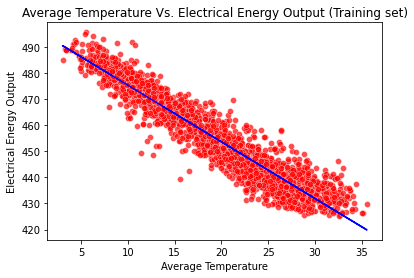

In [17]:
plt.scatter(x_train,y_train, color = "red", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
plt.plot(x_train, train, color='blue')
plt.title('Average Temperature Vs. Electrical Energy Output (Training set)')
plt.xlabel('Average Temperature')
plt.ylabel('Electrical Energy Output')
plt.show()

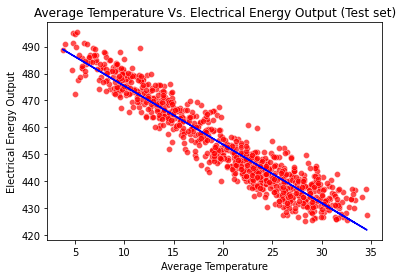

In [18]:
plt.scatter(x_test,y_test, color = "red", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
plt.plot(x_test, y_pred, color='blue')
plt.title('Average Temperature Vs. Electrical Energy Output (Test set)')
plt.xlabel('Average Temperature')
plt.ylabel('Electrical Energy Output')
plt.show()

In [20]:
rmse = 0
for i in range(len(y_test)):
    rmse += (y_test[i] - y_pred[i]) ** 2

rmse = np.sqrt(rmse/len(y_test))

print('Root Mean Squared Error: %.3f' % (rmse))

Root Mean Squared Error: 5.201


In [21]:
SSt = 0
SSr = 0

for i in range(len(y_test)):
    SSt += (y_test[i] - mean_y) ** 2
    SSr += (y_test[i] - y_pred[i]) ** 2

R2 = 1 - (SSr/SSt)
print('R-square: %.3f'%R2)

R-square: 0.905


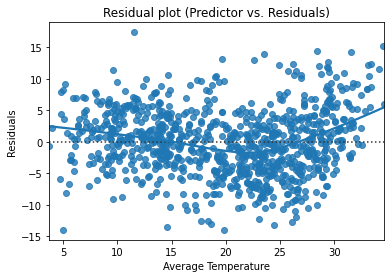

In [19]:
a = sns.residplot(x=x_test, y=y_test, lowess=True).set_title("Residual plot (Predictor vs. Residuals)")
plt.xlabel('Average Temperature')
plt.ylabel('Residuals')
plt.show()

In [29]:
err = []
for i in range(len(y_test)):
    err.append(np.abs(y_test[i] - y_pred[i]))

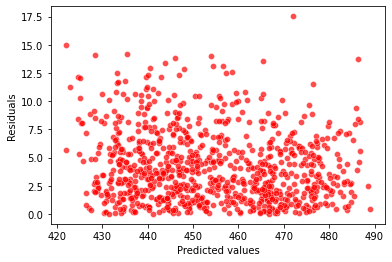

In [33]:
plt.scatter(y_pred,err, color = "red", edgecolors = "white", linewidths = 0.4, alpha = 0.7)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()